In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py as h5py
from mpl_toolkits.basemap import Basemap, cm

In [2]:
hdf5 = '/notebooks/3B-MO.MS.MRG.3IMERG.20150801-S000000-E235959.08.V06A.HDF5'
f = h5py.File(hdf5,'r') # Change this to the proper path

In [3]:
list(f.keys())

['Grid']

In [4]:
dataset = f['Grid']

In [5]:
list(dataset)

['nv',
 'lonv',
 'latv',
 'time',
 'lon',
 'lat',
 'time_bnds',
 'lon_bnds',
 'lat_bnds',
 'precipitation',
 'randomError',
 'gaugeRelativeWeighting',
 'probabilityLiquidPrecipitation',
 'precipitationQualityIndex']

In [42]:
list(dataset['precipitation'][0])

[array([-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       dtype=float32),
 array([-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       dtype=float32),
 array([-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       dtype=float32),
 array([-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       dtype=float32),
 array([-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       dtype=float32),
 array([-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       dtype=float32),
 array([-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       dtype=float32),
 array([-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       dtype=float32),
 array([-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       dtype=float32),
 array([-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       dtype=float32),
 array([-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       dtype=float32),

In [10]:
dataset['precipitation'][0].shape

(3600, 1800)

In [17]:
precip = np.transpose(dataset['precipitation'][0])

In [19]:
precip.shape

(1800, 3600)

In [20]:
theLats= dataset['lat'][:]

theLons = dataset['lon'][:]

In [69]:
list(dataset['precipitation'])

[array([[-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        ...,
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9]],
       dtype=float32)]

In [72]:
list(dataset)

['nv',
 'lonv',
 'latv',
 'time',
 'lon',
 'lat',
 'time_bnds',
 'lon_bnds',
 'lat_bnds',
 'precipitation',
 'randomError',
 'gaugeRelativeWeighting',
 'probabilityLiquidPrecipitation',
 'precipitationQualityIndex']

In [40]:
if -17.25 in theLats :
    print("Yes, I found in the List")

Yes, I found in the List


In [27]:
theLats.dtype

dtype('<f4')

In [70]:
# import sys
# print(sys.maxsize)
# np.set_printoptions(threshold=sys.maxsize)
# np.set_printoptions(threshold=1000)
# with open('precipitation_short.txt', 'w') as f:
#     for item in dataset['precipitation']:
#         f.write("%s\n" % item)

In [78]:
len(dataset['precipitation'][0])

3600

In [79]:
len(precip)

1800

AttributeError: 'GeoAxesSubplot' object has no attribute 'drawstates'

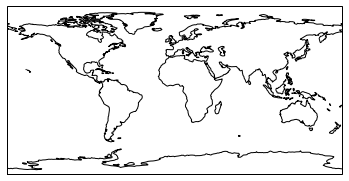

In [84]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.drawstates()

# Save the plot by calling plt.savefig() BEFORE plt.show()
plt.savefig('coastlines.pdf')
plt.savefig('coastlines.png')

plt.show()

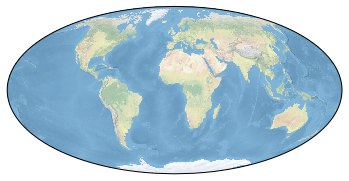

In [81]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

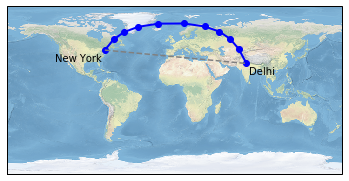

In [82]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()